* 归一化解释

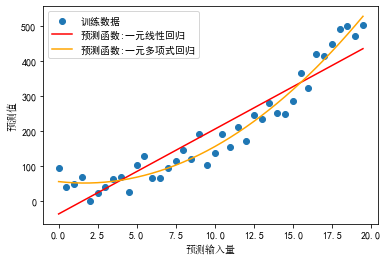

In [2]:
# 模拟一元多项式回归
# 添加[合理]杂质 
# ==>一元多项式更合理
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['SimHei']
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 生成模拟数据 y = 10.5 - 2.4 *x + 1.4 * x^2  -7.2
#添加干扰项
impurity_x = np.arange(0, 20, 0.5).reshape(-1, 1) 
impurity_y = 10.5 - 2.4 * impurity_x + 1.4 * impurity_x ** 2 - 7.2  + np.random.uniform(-20, 100, impurity_x.shape)
# print(impurity_x,impurity_x.shape,impurity_y.shape)
train_x =impurity_x[:,:]
train_y =impurity_y[:,:]
plt.scatter(train_x, train_y, label='训练数据')
# 一元线性回归
model = LinearRegression()
model.fit(train_x, train_y)
line_x = np.arange(0, 20, 0.5).reshape(-1, 1)
line_y = model.predict(line_x)
plt.plot(line_x, line_y, label='预测函数:一元线性回归',c='r')
# 一元多项式回归
quad_model = PolynomialFeatures(degree=2)
train_x_quad = quad_model.fit_transform(train_x)
model2 = LinearRegression()
model2.fit(train_x_quad, train_y)

test_x = np.arange(0, 20, 0.5).reshape(-1, 1)
quad_test_x = quad_model.fit_transform(test_x)
test_y = model2.predict(quad_test_x)
plt.plot(test_x, test_y, label='预测函数:一元多项式回归',c='orange')
plt.xlabel('预测输入量', fontproperties="SimSun")
plt.ylabel('预测值', fontproperties="SimSun")
plt.legend()
plt.show()